### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a different Neural Network Architectures and compare your results. 
Predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.



### 1) Import Libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization


### 2) Load Data

In [176]:
# Load data
data = pd.read_csv("C:/Users/PC/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Documents/DeepLearning/Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review data:



In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

In [178]:
# # Drop irrelevant columns
dataset = data.drop(['StudentID', 'Gender', 'Ethnicity', 'GradeClass'], axis=1)
dataset.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,2,4.672495,17,1,3,0,0,0,0,1.288061


### 5. Check if the columns has any null values:

In [179]:
#  Check for null values
print("Conteo de valores nulos")
dataset.isnull().sum()

Conteo de valores nulos


Age                  0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

### 6. Prepare your data for training and for testing set:

In [180]:
# Prepare the data
X = dataset.drop(['GPA'], axis=1)
y = data['GPA']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check dimensions
print("Shape of X_train:", X_train.shape) 


Shape of X_train: (1913, 10)


### 7. Define different Neural Network Architectures

#### Experiment 1: A single Dense Hidden Layer

In [181]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [182]:
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,            # Number of iterations
    batch_size=10,        # Size of each batch
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1             # Display progress during training
)

Epoch 1/50


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.9067 - mean_absolute_error: 1.4062 - val_loss: 0.2592 - val_mean_absolute_error: 0.4232
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1873 - mean_absolute_error: 0.3434 - val_loss: 0.0886 - val_mean_absolute_error: 0.2417
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0872 - mean_absolute_error: 0.2343 - val_loss: 0.0713 - val_mean_absolute_error: 0.2196
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0709 - mean_absolute_error: 0.2120 - val_loss: 0.0609 - val_mean_absolute_error: 0.2013
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0616 - mean_absolute_error: 0.2003 - val_loss: 0.0537 - val_mean_absolute_error: 0.1903
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0555 - mean_absolute_error: 0.1924 - val_loss: 0.0495 - val_mean_absolute_error: 0.1813
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0515 - mean_absolute_error: 0.1821 - val_loss: 0.

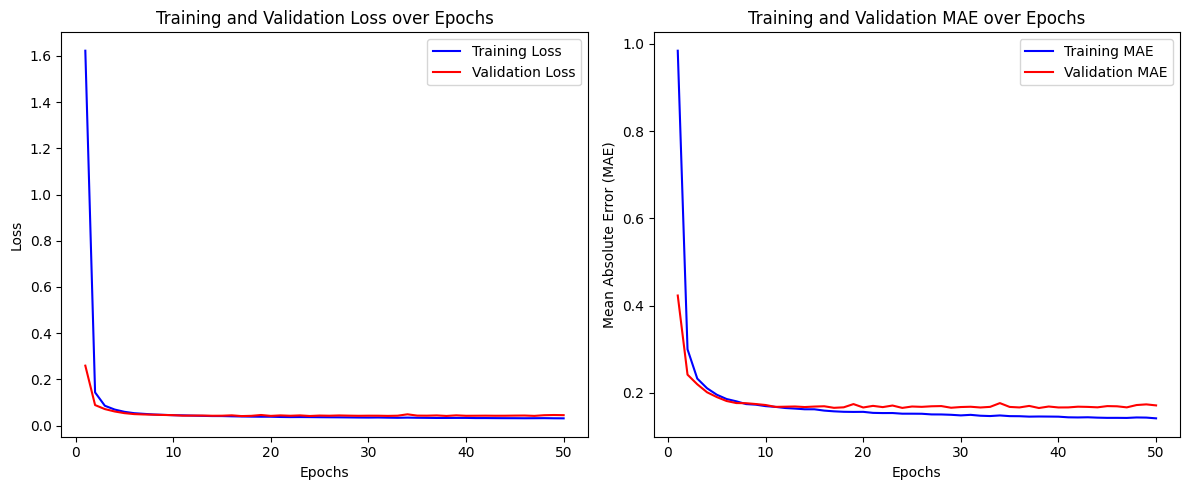

In [183]:
# History values for loss and MAE 
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Training and Validation Loss Plot
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

La gráfica refleja que el modelo del Experimento 1 con una sola capa densa es eficiente, con un aprendizaje rápido y estable. Además, demuestra una buena generalización a los datos de validación, ya que no hay signos de sobreajuste. Sin embargo, debido a la simplicidad del modelo, su capacidad para capturar patrones más complejos puede ser limitada en comparación con experimentos con arquitecturas más profundas o técnicas de regularización avanzadas.

In [184]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0506 - mean_absolute_error: 0.1777 
Test Loss (MSE): 0.050356991589069366
Test Mean Absolute Error (MAE): 0.1774599552154541


In [185]:
# Make predictions
y_pred = model.predict(X_test)

# Display the first 10 predictions and actual values for comparison
for i in range(10):  # Display the first 10 predictions for comparison
    print(f"Predicted GPA: {y_pred[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Calculate Overall MAE using sklearn
from sklearn.metrics import mean_absolute_error

# Calculate MAE between predictions and actual values
overall_mae = mean_absolute_error(y_test, y_pred)
print(f"\nOverall Mean Absolute Error (MAE) on Test Set: {overall_mae:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted GPA: 1.63, Actual GPA: 1.43
Predicted GPA: 3.01, Actual GPA: 3.12
Predicted GPA: 1.81, Actual GPA: 2.04
Predicted GPA: 3.52, Actual GPA: 3.55
Predicted GPA: 0.14, Actual GPA: 0.25
Predicted GPA: 2.81, Actual GPA: 2.63
Predicted GPA: 1.65, Actual GPA: 2.06
Predicted GPA: 2.19, Actual GPA: 2.25
Predicted GPA: 2.08, Actual GPA: 2.19
Predicted GPA: 1.05, Actual GPA: 0.76

Overall Mean Absolute Error (MAE) on Test Set: 0.18


#### Experiment 2: A set of three Dense Hidden Layers

In [186]:
# Define the neural network architecture with three dense hidden layers
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model_2.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mean_absolute_error'])

model_2.summary()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# Train the model
history_2 = model_2.fit(
    X_train, 
    y_train, 
    epochs=50,            # Number of iterations
    batch_size=10,        # Size of each batch
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1             # Display progress during training
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8346 - mean_absolute_error: 0.6485 - val_loss: 0.0791 - val_mean_absolute_error: 0.2291
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692 - mean_absolute_error: 0.2124 - val_loss: 0.0528 - val_mean_absolute_error: 0.1890
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0487 - mean_absolute_error: 0.1787 - val_loss: 0.0566 - val_mean_absolute_error: 0.1901
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461 - mean_absolute_error: 0.1722 - val_loss: 0.0486 - val_mean_absolute_error: 0.1759
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.1634 - val_loss: 0.0581 - val_mean_absolute_error: 0.1959
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0400 - mean_absolute_error: 0.1601 - val_loss: 0.0496 - val_mean_absolute_error: 0.1791
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0379 - mean_absolute_error: 0.1581 - v

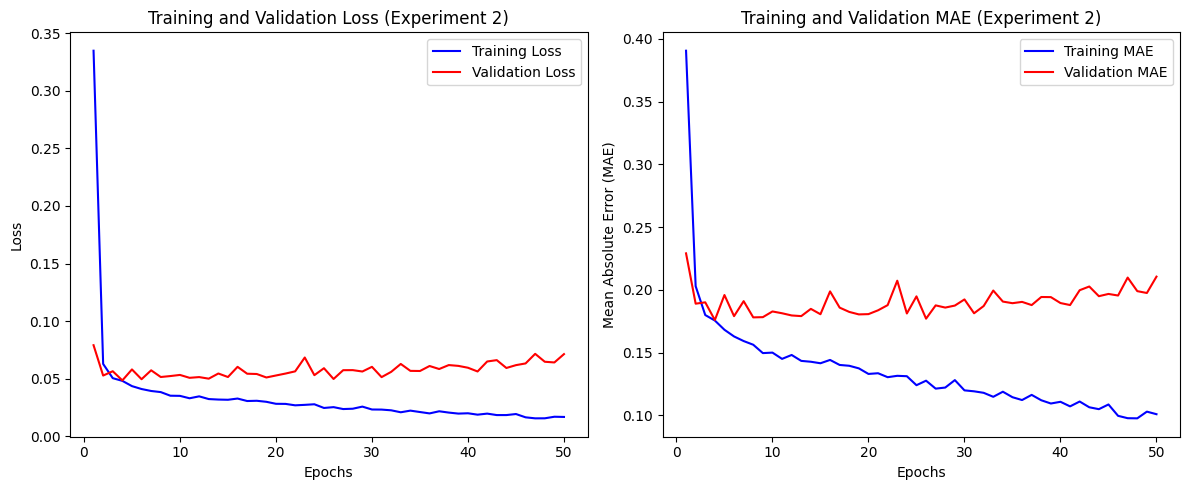

In [188]:
# History values for loss and MAE 
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
mae_2 = history_2.history['mean_absolute_error']
val_mae_2 = history_2.history['val_mean_absolute_error']
epochs_2 = range(1, len(loss_2) + 1)

# Training and Validation Loss Plot
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_2, loss_2, 'b', label='Training Loss')
plt.plot(epochs_2, val_loss_2, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Experiment 2)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs_2, mae_2, 'b', label='Training MAE')
plt.plot(epochs_2, val_mae_2, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE (Experiment 2)')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

El modelo del Experimento 2 con tres capas densas tiene mayor capacidad de aprendizaje, pero la gráfica revela un problema de sobreajuste. Esto se evidencia por la creciente discrepancia entre las curvas de entrenamiento y validación. Para mejorar el desempeño de este modelo, sería necesario aplicar técnicas de regularización, como capas de Dropout o Batch Normalization, que podrían estabilizar el entrenamiento y mejorar la generalización.

In [189]:
# Evaluate the model on the test set 
test_loss_2, test_mae_2 = model_2.evaluate(X_test, y_test, verbose=1)
print(f"Experiment 2 - Test Loss (MSE): {test_loss_2}")
print(f"Experiment 2 - Test Mean Absolute Error (MAE): {test_mae_2}")

# Make predictions 
y_pred_2 = model_2.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0736 - mean_absolute_error: 0.2068 
Experiment 2 - Test Loss (MSE): 0.07226863503456116
Experiment 2 - Test Mean Absolute Error (MAE): 0.20949308574199677
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [190]:
# Display the first 10 predictions and actual values for comparison 
print(f"Experiment 2 - Predicted GPA: {y_pred_2[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Calculate Overall MAE using sklearn 
from sklearn.metrics import mean_absolute_error

# Calculate MAE between predictions and actual values 
overall_mae_2 = mean_absolute_error(y_test, y_pred_2)
print(f"\nExperiment 2 - Overall Mean Absolute Error (MAE) on Test Set: {overall_mae_2:.2f}")

Experiment 2 - Predicted GPA: 1.01, Actual GPA: 0.76

Experiment 2 - Overall Mean Absolute Error (MAE) on Test Set: 0.21


#### Experiment 3: Add a dropout layer after each Dense Hidden Layer

In [191]:
# Define the neural network architecture 
model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dropout(0.3),  # Dropout layer
    Dense(1, activation='linear')  # Output layer for regression
])


# Compile the model
model_3.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mean_absolute_error'])

model_3.summary()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
# Train the model
history_3 = model_3.fit(
    X_train, 
    y_train, 
    epochs=50,            # Number of iterations
    batch_size=10,        # Size of each batch
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1             # Display progress during training
)

Epoch 1/50


153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.3392 - mean_absolute_error: 1.2162 - val_loss: 0.1580 - val_mean_absolute_error: 0.3331
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4995 - mean_absolute_error: 0.5434 - val_loss: 0.1702 - val_mean_absolute_error: 0.3463
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3898 - mean_absolute_error: 0.4886 - val_loss: 0.1210 - val_mean_absolute_error: 0.2909
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3337 - mean_absolute_error: 0.4436 - val_loss: 0.1009 - val_mean_absolute_error: 0.2624
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2955 - mean_absolute_error: 0.4108 - val_loss: 0.0983 - val_mean_absolute_error: 0.2596
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2570 - mean_absolute_error: 0.3782 - val_loss: 0.1103 - val_mean_absolute_error: 0.2792
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2497 - mean_absolute_error: 0.3786 - val_loss: 0.

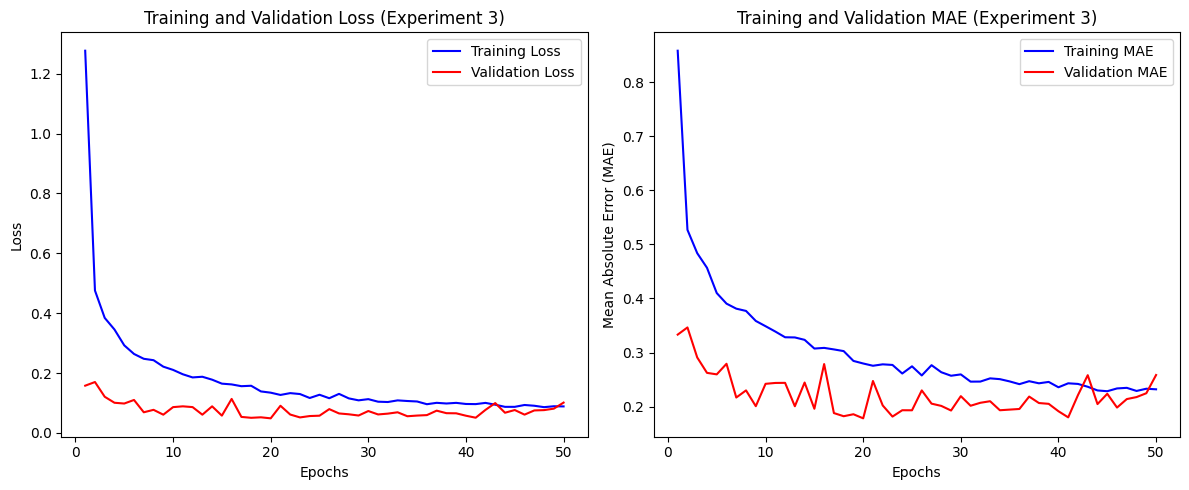

In [204]:
# History values for loss and MAE 
loss_3 = history_3.history['loss']
val_loss_3 = history_3.history['val_loss']
mae_3 = history_3.history['mean_absolute_error']
val_mae_3 = history_3.history['val_mean_absolute_error']
epochs_3 = range(1, len(loss_3) + 1)

# Training and Validation Loss Plot
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_3, loss_3, 'b', label='Training Loss')
plt.plot(epochs_3, val_loss_3, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Experiment 3)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs_3, mae_3, 'b', label='Training MAE')
plt.plot(epochs_3, val_mae_3, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE (Experiment 3)')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

El modelo del Experimento 3, con capas de Dropout, muestra un desempeño más equilibrado que el modelo del Experimento 2, mitigando el sobreajuste y mejorando la generalización. Sin embargo, la introducción de Dropout parece haber reducido ligeramente la precisión del modelo en comparación con el Experimento 1, probablemente debido a que la regularización excesiva limita su capacidad de aprendizaje. Para optimizar este modelo, podría beneficiarse de combinaciones con técnicas adicionales, como normalización por lotes (Batch Normalization).


In [194]:
# Evaluate the model on the test set 
test_loss_3, test_mae_3 = model_3.evaluate(X_test, y_test, verbose=1)
print(f"Experiment 3 - Test Loss (MSE): {test_loss_3}")
print(f"Experiment 3 - Test Mean Absolute Error (MAE): {test_mae_3}")

# Make predictions
y_pred_3 = model_3.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0929 - mean_absolute_error: 0.2485 
Experiment 3 - Test Loss (MSE): 0.09313993155956268
Experiment 3 - Test Mean Absolute Error (MAE): 0.24728716909885406
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [195]:
# Display the first 10 predictions and actual values for comparison 
print(f"Experiment 3 - Predicted GPA: {y_pred_3[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Calculate Overall MAE using sklearn 
from sklearn.metrics import mean_absolute_error

# Calculate MAE between predictions and actual values 
overall_mae_3 = mean_absolute_error(y_test, y_pred_3)
print(f"\nExperiment 3 - Overall Mean Absolute Error (MAE) on Test Set: {overall_mae_3:.2f}")

Experiment 3 - Predicted GPA: 1.12, Actual GPA: 0.76

Experiment 3 - Overall Mean Absolute Error (MAE) on Test Set: 0.25


#### Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.

In [196]:
# Define the neural network architecture for Experiment 4
model_4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout layer
    BatchNormalization(),  # Batch Normalization layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout layer
    BatchNormalization(),  # Batch Normalization layer
    Dense(32, activation='relu'),  # Third hidden layer
    Dropout(0.3),  # Dropout layer
    BatchNormalization(),  # Batch Normalization layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model_4.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mean_absolute_error'])

model_4.summary()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,225 (47.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [197]:
# Train the model
history_4 = model_4.fit(
    X_train, 
    y_train, 
    epochs=50,            # Number of iterations
    batch_size=10,        # Size of each batch
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1             # Display progress during training
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 5.0640 - mean_absolute_error: 1.8581 - val_loss: 0.9676 - val_mean_absolute_error: 0.8109
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7219 - mean_absolute_error: 1.0538 - val_loss: 0.2404 - val_mean_absolute_error: 0.4016
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2176 - mean_absolute_error: 0.9033 - val_loss: 0.1812 - val_mean_absolute_error: 0.3415
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9572 - mean_absolute_error: 0.7928 - val_loss: 0.1250 - val_mean_absolute_error: 0.2810
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6811 - mean_absolute_error: 0.6579 - val_loss: 0.1150 - val_mean_absolute_error: 0.2727
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5663 - mean_absolute_error: 0.6011 - val_loss: 0.1023 - val_mean_absolute_error: 0.2502
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4338 - mean_absolute_error: 0.5179 - v

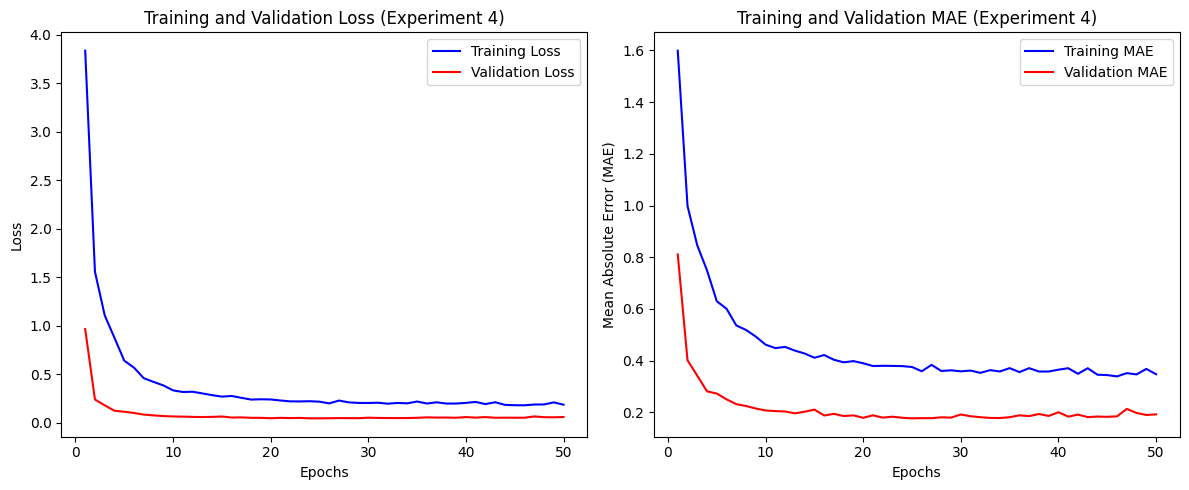

In [206]:
# History values for loss and MAE 
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']
mae_4 = history_4.history['mean_absolute_error']
val_mae_4 = history_4.history['val_mean_absolute_error']
epochs_4 = range(1, len(loss_4) + 1)

# Training and Validation Loss Plot
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs_4, loss_4, 'b', label='Training Loss')
plt.plot(epochs_4, val_loss_4, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Experiment 4)')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs_4, mae_4, 'b', label='Training MAE')
plt.plot(epochs_4, val_mae_4, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE (Experiment 4)')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

El Experimento 4, que incluye Dropout y Batch Normalization, muestra el mejor desempeño entre todos los experimentos. La gráfica indica un modelo bien regularizado, con curvas de pérdida y MAE muy cercanas entre entrenamiento y validación, lo que demuestra un excelente equilibrio entre aprendizaje y generalización. Esta combinación de técnicas permitió que el modelo aprovechara su capacidad de manera eficiente sin sobreajustarse.

In [199]:
# Evaluate the model on the test set 
test_loss_4, test_mae_4 = model_4.evaluate(X_test, y_test, verbose=1)
print(f"Experiment 4 - Test Loss (MSE): {test_loss_4}")
print(f"Experiment 4 - Test Mean Absolute Error (MAE): {test_mae_4}")

# Make predictions
y_pred_4 = model_4.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0650 - mean_absolute_error: 0.2097 
Experiment 4 - Test Loss (MSE): 0.058198168873786926
Experiment 4 - Test Mean Absolute Error (MAE): 0.19523905217647552
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [200]:
# Display the first 10 predictions and actual values for comparison 
print(f"Experiment 4 - Predicted GPA: {y_pred_4[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Calculate Overall MAE using sklearn 
from sklearn.metrics import mean_absolute_error

# Calculate MAE between predictions and actual values 
overall_mae_4 = mean_absolute_error(y_test, y_pred_4)
print(f"\nExperiment 4 - Overall Mean Absolute Error (MAE) on Test Set: {overall_mae_4:.2f}")

Experiment 4 - Predicted GPA: 1.02, Actual GPA: 0.76

Experiment 4 - Overall Mean Absolute Error (MAE) on Test Set: 0.20


# Comparative table

In [207]:
# Create a DataFrame focusing on the architecture of the neural networks

architecture_comparison = pd.DataFrame({
    "Experiment": [
        "Experiment 1: Single Dense Layer",
        "Experiment 2: Three Dense Layers",
        "Experiment 3: Dropout Layers",
        "Experiment 4: Dropout + Batch Norm"
    ],
    "Number of Hidden Layers": [1, 3, 3, 3],
    "Hidden Layers Configuration": [
        "1 Dense (64 neurons, ReLU)",
        "3 Dense (128, 64, 32 neurons, ReLU)",
        "3 Dense (128, 64, 32 neurons, ReLU) + Dropout (0.3)",
        "3 Dense (128, 64, 32 neurons, ReLU) + Dropout (0.3) + Batch Norm"
    ],
    "Regularization Methods": [
        "None",
        "None",
        "Dropout (0.3 after each hidden layer)",
        "Dropout (0.3) + Batch Normalization (after each hidden layer)"
    ],
    "Activation Function": ["ReLU", "ReLU", "ReLU", "ReLU"],
    "Output Layer": ["1 Dense (1 neuron, Linear)", "1 Dense (1 neuron, Linear)", 
                     "1 Dense (1 neuron, Linear)", "1 Dense (1 neuron, Linear)"]
})


architecture_comparison

,Experiment,Number of Hidden Layers,Hidden Layers Configuration,Regularization Methods,Activation Function,Output Layer
0,Experiment 1: Single Dense Layer,1,"1 Dense (64 neurons, ReLU)",None,ReLU,"1 Dense (1 neuron, Linear)"
1,Experiment 2: Three Dense Layers,3,"3 Dense (128, 64, 32 neurons, ReLU)",None,ReLU,"1 Dense (1 neuron, Linear)"
2,Experiment 3: Dropout Layers,3,"3 Dense (128, 64, 32 neurons, ReLU) + Dropout ...",Dropout (0.3 after each hidden layer),ReLU,"1 Dense (1 neuron, Linear)"
3,Experiment 4: Dropout + Batch Norm,3,"3 Dense (128, 64, 32 neurons, ReLU) + Dropout ...",Dropout (0.3) + Batch Normalization (after eac...,ReLU,"1 Dense (1 neuron, Linear)"


In [203]:
# Create a DataFrame for the results of the experiments
experiment_results = pd.DataFrame({
    "Experiment": [
        "Experiment 1: Single Dense Layer",
        "Experiment 2: Three Dense Layers",
        "Experiment 3: Dropout Layers",
        "Experiment 4: Dropout + Batch Norm"
    ],
    "Hidden Layers Configuration": [
        "1 Dense (64 neurons, ReLU)",
        "3 Dense (128, 64, 32 neurons, ReLU)",
        "3 Dense (128, 64, 32 neurons, ReLU) + Dropout (0.3)",
        "3 Dense (128, 64, 32 neurons, ReLU) + Dropout (0.3) + Batch Norm"
    ],
    "Test Loss (MSE)": [
        test_loss,  
        test_loss_2,  
        test_loss_3,  
        test_loss_4  
    ],
    "Test MAE": [
        test_mae,  
        test_mae_2,  
        test_mae_3, 
        test_mae_4  
    ],
    "Overall MAE on Test Set": [
        overall_mae,  
        overall_mae_2,  
        overall_mae_3,  
        overall_mae_4  
    ]
})

experiment_results


,Experiment,Hidden Layers Configuration,Test Loss (MSE),Test MAE,Overall MAE on Test Set
0,Experiment 1: Single Dense Layer,"1 Dense (64 neurons, ReLU)",0.050357,0.177460,0.177460
1,Experiment 2: Three Dense Layers,"3 Dense (128, 64, 32 neurons, ReLU)",0.072269,0.209493,0.209493
2,Experiment 3: Dropout Layers,"3 Dense (128, 64, 32 neurons, ReLU) + Dropout ...",0.093140,0.247287,0.247287
3,Experiment 4: Dropout + Batch Norm,"3 Dense (128, 64, 32 neurons, ReLU) + Dropout ...",0.058198,0.195239,0.195239


1. **Experimento 1: Una Capa Densa Simple**:
   - Este experimento utilizó una arquitectura simple con una sola capa densa. Aunque obtuvo un desempeño razonable, la arquitectura podría carecer de la capacidad para aprender patrones complejos en los datos en comparación con modelos más profundos.

2. **Experimento 2: Tres Capas Densas**:
   - Al aumentar el número de capas ocultas, el modelo incrementó su capacidad, pero obtuvo un rendimiento ligeramente peor que el Experimento 1. Esto puede indicar sobreajuste o dificultades de optimización debido a la mayor complejidad del modelo.

3. **Experimento 3: Capas de Dropout**:
   - La inclusión de capas de dropout mejoró la regularización del modelo, pero los valores más altos de pérdida y MAE sugieren un posible subajuste. El modelo podría haberse vuelto demasiado escaso debido al dropout, limitando su capacidad para capturar los patrones subyacentes.

4. **Experimento 4: Dropout + Normalización por Lotes**:
   - La combinación de dropout con normalización por lotes resultó en el mejor desempeño de todos los experimentos. La normalización por lotes probablemente estabilizó y aceleró el entrenamiento, mientras que el dropout ayudó a evitar el sobreajuste, logrando un balance adecuado.

### Mejor Experimento:
El **Experimento 4: Dropout + Normalización por Lotes** es el mejor porque:
- Logró la **menor pérdida en pruebas (MSE)** (0.058198) y un **MAE general mejorado** (0.195239) en comparación con las demás arquitecturas.
- La combinación de normalización por lotes y dropout permitió regularizar el modelo eficazmente y estabilizar el aprendizaje, lo que resultó en una mejor capacidad de generalización.

### Conclusión:
Agregar **normalización por lotes** después de las capas de dropout (Experimento 4) ofreció la arquitectura más equilibrada, mitigando eficazmente el sobreajuste y manteniendo la capacidad del modelo para aprender relaciones complejas. 